In [1]:
!apt-get install fonts-nanum** -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[font for font in sys_font if 'Nanum' in font]

['/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGot

In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 42.4 MB/s 


In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
%%time
jtbc_economy = requests.get("http://fs.jtbc.joins.com/RSS/economy.xml")
economy_news_list = BeautifulSoup(jtbc_economy.content, "xml")
link_list = economy_news_list.select("item > link")

news_data = []
for link in link_list:
    news = requests.get(link.text)
    news_soup = BeautifulSoup(news.content, "html.parser")
    news_content = news_soup.select_one("#articlebody > .article_content")
    news_data.append(news_content.text)

news_df = pd.DataFrame(data=news_data, columns=["news"])

CPU times: user 893 ms, sys: 53.8 ms, total: 947 ms
Wall time: 33.4 s


In [7]:
news_df.head()

,news
0,"\n현대중공업 그룹의 조선 중간 지주사인 한국조선해양이, 대형 액화 천연가스 운반선..."
1,\n이번 주 서울 강남구 아파트값이 넉 달만에 처음으로 떨어졌습니다.한국부동산원에 ...
2,\n■ 인용보도 시 프로그램명 'JTBC 아침&'을 밝혀주시기 바랍니다. 저작권은 ...
3,\n[앵커]요즘 공장 기계를 못 돌리는 중소기업이 적지 않습니다. 껑충 뛴 원자잿값...
4,\n[앵커]일찍 찾아온 습하고 더운 날씨 때문에 집집마다 에어컨 켜면서도 전기요금이...


In [8]:
from konlpy.tag import Komoran
komoran = Komoran()

In [10]:
import numpy as np
print(komoran.nouns("%r"%np.ravel(news_df.news)))

['현대중공업', '그룹', '조선', '중간', '지주', '사인', '한국', '조선', '해양', '대형', '액화', '천연가스', '운반선', '척', '원', '금액', '수주', '한국', '조선', '해양', '유럽', '오세아니아', '선사', '운반선', '척', '건조', '계약', '공시', '이', '한국', '조선', '해양', '올해', '수주', '목표', '달성', '이번', '서울', '강남구', '아파트', '값', '달', '처음', '한국', '부동산', '원', '강남구', '아파트', '값', '3월', '조사', '때', '뒤', '상승세', '보합세', '이번', '이번', '서울', '전체', '아파트', '값', '지난주', '마찬가지', '주', '연속', '하락세', '이', '아파트', '값', '건', '금리', '데', '경기', '침체', '우려', '때문', '것', '분석', '인용', '보도', '시', '프로그램', '명', '아침', '저작권', '방송', '아침', '진행', '김하은', '앵커', '이번', '밤사이', '마감', '미국', '증시', '상황', '미래에셋증권', '서상영', '본부장', '안녕하세요', '서상영', '본부장', '안녕하십니까', '앵커', '본부장', '미국', '증시', '오늘', '일', '상승', '흐름', '서상영', '본부장', '미국', '증시', '견조', '삼성전자', '실적', '반도체', '업종', '국제', '유가', '급증', '에너지', '업종', '기차', '산업', '기대', '심리', '관련', '종목', '거래', '강세', '상승', '견인', '영국', '총리', '사임', '긍정', '영향', '위험', '자산', '선호', '심리', '자극', '가운데', '장', '후반', '전', '미', '연준', '의사록', '공개', '블러드', '총재', '경기', '자신감', '표명', '등', '호재', '반응', '강세

In [11]:
word_list = komoran.nouns("%r"%np.ravel(news_df.news))

In [12]:
text = ' '.join(word_list)

In [13]:
text

'현대중공업 그룹 조선 중간 지주 사인 한국 조선 해양 대형 액화 천연가스 운반선 척 원 금액 수주 한국 조선 해양 유럽 오세아니아 선사 운반선 척 건조 계약 공시 이 한국 조선 해양 올해 수주 목표 달성 이번 서울 강남구 아파트 값 달 처음 한국 부동산 원 강남구 아파트 값 3월 조사 때 뒤 상승세 보합세 이번 이번 서울 전체 아파트 값 지난주 마찬가지 주 연속 하락세 이 아파트 값 건 금리 데 경기 침체 우려 때문 것 분석 인용 보도 시 프로그램 명 아침 저작권 방송 아침 진행 김하은 앵커 이번 밤사이 마감 미국 증시 상황 미래에셋증권 서상영 본부장 안녕하세요 서상영 본부장 안녕하십니까 앵커 본부장 미국 증시 오늘 일 상승 흐름 서상영 본부장 미국 증시 견조 삼성전자 실적 반도체 업종 국제 유가 급증 에너지 업종 기차 산업 기대 심리 관련 종목 거래 강세 상승 견인 영국 총리 사임 긍정 영향 위험 자산 선호 심리 자극 가운데 장 후반 전 미 연준 의사록 공개 블러드 총재 경기 자신감 표명 등 호재 반응 강세 앵커 삼성전자 실적 발표 반도체 업종 상승 긍정 영향 부분 설명 서상영 본부장 삼성전자 분기 잠정 실적 시장 예상 소폭 하위 결과 정도 예견 반응 예상 하위 쇼크 점 관련 업종 긍정 영향 마이크론 가이던스 하향 조정 실적 발표 당시 조정 가동 조정 가격 방어 전략 언급 때문 긍정 요인 집중 것 추정 시장 램 가격 하락 촉발 고객 재고 조정 하반기 마무리 것 전망 점 관련 산업 투자 심리 개선 요인 앵커 테슬라 기차 업종 급등 이유 때문 서상영 본부장 테슬라 기차 기차 충전 업종 등 급등 폭스바겐 기차 산업 전망 주장 유럽 미국 수요 주장 점 번 중국 정부 기차 세금 감면 연장 충전 소 건설 자동차 수요 촉진 조치 발표 점 번 테슬라 올해 말 기차 충전 시설 업체 차량 공개 충전 시설 최근 확대 점 전반 기차 산업 긍정 영향 앵커 가지 복합 이유 작용 어제 주식 시장 흐름 오늘 서상영 본부장 미 증시 전일 경기 자신감 부각 가운데 개별 업종 중심 호재 재

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# !pip install wordcloud

In [16]:
from wordcloud import WordCloud

In [17]:
wordcloud = WordCloud(background_color="white",
                      max_words=2000,
                      relative_scaling=0.2,
                      font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

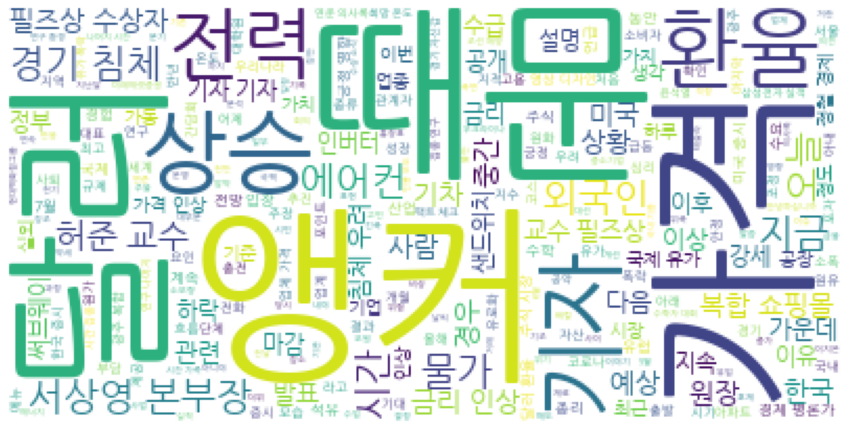

In [18]:
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
stow_w = set(["앵커", "기자", "것", "수"])

In [20]:
wordcloud = WordCloud(background_color="white",
                      max_words=2000,
                      stopwords=stow_w,
                      relative_scaling=0.2,
                      font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

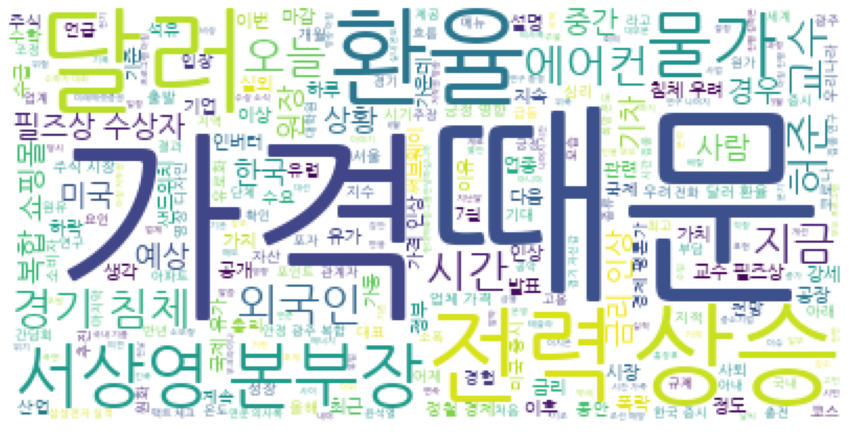

In [21]:
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
import numpy as np
from PIL import Image
img = Image.open("/content/snowman.png").convert("RGBA")
mask_ar = np.array(img)

In [23]:
wordcloud = WordCloud(background_color="white",
                      max_words=2000,
                      stopwords=stow_w,
                      font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      mask=mask_ar, random_state=42)

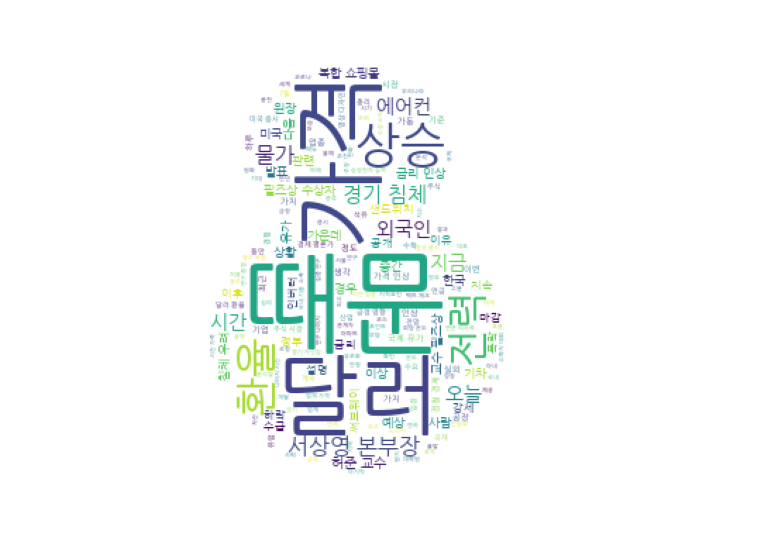

In [24]:
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud.to_file("result1.png")